# 10 Minutes to pandas

In [1]:
import numpy as np
import pandas as pd

## Object Creation

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [5]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [7]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-0.494203,-0.934745,-1.651743,-2.683626
2013-01-02,0.748348,0.410551,0.297443,0.842849
2013-01-03,0.665403,-0.002340,0.933297,0.411271
2013-01-04,-0.193697,1.152572,-0.443915,0.257551
2013-01-05,-1.387114,2.199116,-0.059880,-0.541941
2013-01-06,0.566910,-0.031769,-1.722092,-2.263484


In [8]:
df2 = pd.DataFrame({'A': 1.,
   ...:                     'B': pd.Timestamp('20130102'),
   ...:                     'C': pd.Series(1, index=list(range(4)), dtype='float32'),
   ...:                     'D': np.array([3] * 4, dtype='int32'),
   ...:                     'E': pd.Categorical(["test", "train", "test", "train"]),
   ...:                     'F': 'foo'})
   ...: 

df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [9]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [10]:
df2.<TAB>

SyntaxError: invalid syntax (<ipython-input-10-915637deb483>, line 1)

## Viewing Data

In [11]:
df.head()

,A,B,C,D
2013-01-01,-0.494203,-0.934745,-1.651743,-2.683626
2013-01-02,0.748348,0.410551,0.297443,0.842849
2013-01-03,0.665403,-0.002340,0.933297,0.411271
2013-01-04,-0.193697,1.152572,-0.443915,0.257551
2013-01-05,-1.387114,2.199116,-0.059880,-0.541941


In [12]:
df.tail(3)

,A,B,C,D
2013-01-04,-0.193697,1.152572,-0.443915,0.257551
2013-01-05,-1.387114,2.199116,-0.059880,-0.541941
2013-01-06,0.566910,-0.031769,-1.722092,-2.263484


In [13]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [15]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.015725,0.465564,-0.441148,-0.662897
std,0.840063,1.086954,1.066428,1.478390
min,-1.387114,-0.934745,-1.722092,-2.683626
25%,-0.419077,-0.024411,-1.349786,-1.833098
50%,0.186607,0.204106,-0.251897,-0.142195
75%,0.640780,0.967067,0.208112,0.372841
max,0.748348,2.199116,0.933297,0.842849


In [16]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,-0.494203,0.748348,0.665403,-0.193697,-1.387114,0.566910
B,-0.934745,0.410551,-0.002340,1.152572,2.199116,-0.031769
C,-1.651743,0.297443,0.933297,-0.443915,-0.059880,-1.722092
D,-2.683626,0.842849,0.411271,0.257551,-0.541941,-2.263484


In [17]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-2.683626,-1.651743,-0.934745,-0.494203
2013-01-02,0.842849,0.297443,0.410551,0.748348
2013-01-03,0.411271,0.933297,-0.002340,0.665403
2013-01-04,0.257551,-0.443915,1.152572,-0.193697
2013-01-05,-0.541941,-0.059880,2.199116,-1.387114
2013-01-06,-2.263484,-1.722092,-0.031769,0.566910


In [18]:
df.sort_values(by='B')

,A,B,C,D
2013-01-01,-0.494203,-0.934745,-1.651743,-2.683626
2013-01-06,0.566910,-0.031769,-1.722092,-2.263484
2013-01-03,0.665403,-0.002340,0.933297,0.411271
2013-01-02,0.748348,0.410551,0.297443,0.842849
2013-01-04,-0.193697,1.152572,-0.443915,0.257551
2013-01-05,-1.387114,2.199116,-0.059880,-0.541941


## Selection

### Getting

In [19]:
df['A']

2013-01-01   -0.494203
2013-01-02    0.748348
2013-01-03    0.665403
2013-01-04   -0.193697
2013-01-05   -1.387114
2013-01-06    0.566910
Freq: D, Name: A, dtype: float64

In [20]:
df[0:3]

,A,B,C,D
2013-01-01,-0.494203,-0.934745,-1.651743,-2.683626
2013-01-02,0.748348,0.410551,0.297443,0.842849
2013-01-03,0.665403,-0.002340,0.933297,0.411271


In [21]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,0.748348,0.410551,0.297443,0.842849
2013-01-03,0.665403,-0.002340,0.933297,0.411271
2013-01-04,-0.193697,1.152572,-0.443915,0.257551


### Selection by Label

In [22]:
df.loc[dates[0]]

A   -0.494203
B   -0.934745
C   -1.651743
D   -2.683626
Name: 2013-01-01 00:00:00, dtype: float64

In [23]:
df.loc[:, ['A', 'B']]

,A,B
2013-01-01,-0.494203,-0.934745
2013-01-02,0.748348,0.410551
2013-01-03,0.665403,-0.002340
2013-01-04,-0.193697,1.152572
2013-01-05,-1.387114,2.199116
2013-01-06,0.566910,-0.031769


In [24]:
df.loc['20130102':'20130104', ['A', 'B']]

,A,B
2013-01-02,0.748348,0.410551
2013-01-03,0.665403,-0.002340
2013-01-04,-0.193697,1.152572


In [25]:
df.loc['20130102', ['A', 'B']]

A    0.748348
B    0.410551
Name: 2013-01-02 00:00:00, dtype: float64

In [26]:
df.loc[dates[0], 'A']

-0.494203443475901

In [27]:
df.at[dates[0], 'A']

-0.494203443475901

### Selection by Position

In [28]:
df.iloc[3]

A   -0.193697
B    1.152572
C   -0.443915
D    0.257551
Name: 2013-01-04 00:00:00, dtype: float64

In [29]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,-0.193697,1.152572
2013-01-05,-1.387114,2.199116


In [30]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,0.748348,0.297443
2013-01-03,0.665403,0.933297
2013-01-05,-1.387114,-0.059880


In [31]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,0.748348,0.410551,0.297443,0.842849
2013-01-03,0.665403,-0.002340,0.933297,0.411271


In [32]:
df.iloc[:, 1:3]

,B,C
2013-01-01,-0.934745,-1.651743
2013-01-02,0.410551,0.297443
2013-01-03,-0.002340,0.933297
2013-01-04,1.152572,-0.443915
2013-01-05,2.199116,-0.059880
2013-01-06,-0.031769,-1.722092


In [33]:
df.iloc[1, 1]

0.41055097235924365

In [34]:
df.iat[1, 1]

0.41055097235924365

### Boolean Indexing

In [35]:
df[df.A > 0]

,A,B,C,D
2013-01-02,0.748348,0.410551,0.297443,0.842849
2013-01-03,0.665403,-0.002340,0.933297,0.411271
2013-01-06,0.566910,-0.031769,-1.722092,-2.263484


In [36]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,0.748348,0.410551,0.297443,0.842849
2013-01-03,0.665403,NaN,0.933297,0.411271
2013-01-04,NaN,1.152572,NaN,0.257551
2013-01-05,NaN,2.199116,NaN,NaN
2013-01-06,0.566910,NaN,NaN,NaN


In [37]:
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2013-01-01,-0.494203,-0.934745,-1.651743,-2.683626,one
2013-01-02,0.748348,0.410551,0.297443,0.842849,one
2013-01-03,0.665403,-0.002340,0.933297,0.411271,two
2013-01-04,-0.193697,1.152572,-0.443915,0.257551,three
2013-01-05,-1.387114,2.199116,-0.059880,-0.541941,four
2013-01-06,0.566910,-0.031769,-1.722092,-2.263484,three


In [38]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,0.665403,-0.002340,0.933297,0.411271,two
2013-01-05,-1.387114,2.199116,-0.059880,-0.541941,four


### Setting

In [58]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [59]:
df['F'] = s1

In [60]:
df.at[dates[0], 'A'] = 0

In [61]:
df.iat[0, 1] = 0

In [62]:
df.loc[:, 'D'] = np.array([5] * len(df))

In [63]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.651743,5,NaN
2013-01-02,0.748348,0.410551,0.297443,5,1.0
2013-01-03,0.665403,-0.002340,0.933297,5,2.0
2013-01-04,-0.193697,1.152572,-0.443915,5,3.0
2013-01-05,-1.387114,2.199116,-0.059880,5,4.0
2013-01-06,0.566910,-0.031769,-1.722092,5,5.0


In [64]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.651743,-5,NaN
2013-01-02,-0.748348,-0.410551,-0.297443,-5,-1.0
2013-01-03,-0.665403,-0.002340,-0.933297,-5,-2.0
2013-01-04,-0.193697,-1.152572,-0.443915,-5,-3.0
2013-01-05,-1.387114,-2.199116,-0.059880,-5,-4.0
2013-01-06,-0.566910,-0.031769,-1.722092,-5,-5.0


## Missing Data

In [65]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1], 'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-1.651743,5,NaN,1.0
2013-01-02,0.748348,0.410551,0.297443,5,1.0,1.0
2013-01-03,0.665403,-0.002340,0.933297,5,2.0,NaN
2013-01-04,-0.193697,1.152572,-0.443915,5,3.0,NaN


In [66]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,0.748348,0.410551,0.297443,5,1.0,1.0


In [67]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-1.651743,5,5.0,1.0
2013-01-02,0.748348,0.410551,0.297443,5,1.0,1.0
2013-01-03,0.665403,-0.002340,0.933297,5,2.0,5.0
2013-01-04,-0.193697,1.152572,-0.443915,5,3.0,5.0


In [68]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## Operations

### Stats

In [69]:
df.mean()

A    0.066642
B    0.621355
C   -0.441148
D    5.000000
F    3.000000
dtype: float64

In [70]:
df.mean(1)

2013-01-01    0.837064
2013-01-02    1.491268
2013-01-03    1.719272
2013-01-04    1.702992
2013-01-05    1.950424
2013-01-06    1.762610
Freq: D, dtype: float64

In [71]:
pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [72]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN
2013-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN
2013-01-03 00:00:00,NaN,NaN,NaN,NaN,NaN
2013-01-04 00:00:00,NaN,NaN,NaN,NaN,NaN
2013-01-05 00:00:00,NaN,NaN,NaN,NaN,NaN
2013-01-06 00:00:00,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN


### Apply

In [73]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.651743,5,NaN
2013-01-02,0.748348,0.410551,-1.354301,10,1.0
2013-01-03,1.413751,0.408211,-0.421004,15,3.0
2013-01-04,1.220054,1.560783,-0.864918,20,6.0
2013-01-05,-0.167060,3.759899,-0.924798,25,10.0
2013-01-06,0.399851,3.728131,-2.646890,30,15.0


In [74]:
df.apply(lambda x: x.max() - x.min())

A    2.135462
B    2.230884
C    2.655389
D    0.000000
F    4.000000
dtype: float64

### Histogramming

In [75]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    1
1    2
2    3
3    5
4    2
5    5
6    1
7    5
8    3
9    3
dtype: int32

In [76]:
s.value_counts()

5    3
3    3
2    2
1    2
dtype: int64

### String Methods

In [77]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [78]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge

### Concat

In [79]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,0.843270,0.188247,0.291543,-0.161391
1,-1.323245,-0.053726,1.628013,0.108848
2,0.977576,-0.105891,1.209320,0.361775
3,0.177538,-0.352565,0.896275,-0.233587
4,1.865610,-1.368381,-0.514432,0.566472
5,-0.872589,-0.020946,0.587806,-0.743694
6,0.040595,0.601530,0.134731,0.693010
7,1.359709,-0.558291,0.821827,1.614561
8,-0.252297,-0.043219,0.734789,0.701672
9,0.455720,0.066468,1.123584,-0.525226


In [80]:
pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,0.843270,0.188247,0.291543,-0.161391
1,-1.323245,-0.053726,1.628013,0.108848
2,0.977576,-0.105891,1.209320,0.361775
3,0.177538,-0.352565,0.896275,-0.233587
4,1.865610,-1.368381,-0.514432,0.566472
5,-0.872589,-0.020946,0.587806,-0.743694
6,0.040595,0.601530,0.134731,0.693010
7,1.359709,-0.558291,0.821827,1.614561
8,-0.252297,-0.043219,0.734789,0.701672
9,0.455720,0.066468,1.123584,-0.525226


### Join

In [81]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
left

,key,lval
0,foo,1
1,foo,2


In [82]:
right

,key,rval
0,foo,4
1,foo,5


In [83]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [84]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
left

,key,lval
0,foo,1
1,bar,2


In [85]:
right

,key,rval
0,foo,4
1,bar,5


In [86]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


### Append

In [87]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,0.823882,-2.907273,0.821224,0.163097
1,-1.989931,0.287027,0.307555,0.217767
2,-1.903096,-2.170294,-0.491310,2.832796
3,0.058609,1.136327,-1.598823,-0.352803
4,-0.084448,0.049403,0.780093,-0.838916
5,0.720152,-0.591591,0.543248,-0.245934
6,-1.308684,-0.518766,0.280173,1.024625
7,0.507981,0.201263,-0.813363,-1.189132


In [89]:
s = df.iloc[3]
df.append(s, ignore_index=True)

,A,B,C,D
0,0.823882,-2.907273,0.821224,0.163097
1,-1.989931,0.287027,0.307555,0.217767
2,-1.903096,-2.170294,-0.491310,2.832796
3,0.058609,1.136327,-1.598823,-0.352803
4,-0.084448,0.049403,0.780093,-0.838916
5,0.720152,-0.591591,0.543248,-0.245934
6,-1.308684,-0.518766,0.280173,1.024625
7,0.507981,0.201263,-0.813363,-1.189132
8,0.058609,1.136327,-1.598823,-0.352803


## Grouping

In [91]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
   ....:                          'foo', 'bar', 'foo', 'foo'],
   ....:                    'B': ['one', 'one', 'two', 'three',
   ....:                          'two', 'two', 'one', 'three'],
   ....:                    'C': np.random.randn(8),
   ....:                    'D': np.random.randn(8)})
   ....:
        
df

,A,B,C,D
0,foo,one,0.334236,-1.745063
1,bar,one,-0.302144,0.285000
2,foo,two,-0.575204,-0.593357
3,bar,three,-0.673889,0.981696
4,foo,two,-2.171223,-0.748727
5,bar,two,-1.026896,-0.102253
6,foo,one,0.005181,0.540178
7,foo,three,1.401743,0.358356


In [92]:
df.groupby('A').sum()

,C,D
A,,
bar,-2.002929,1.164442
foo,-1.005266,-2.188613


In [93]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one   -0.302144  0.285000
    three -0.673889  0.981696
    two   -1.026896 -0.102253
foo one    0.339417 -1.204885
    three  1.401743  0.358356
    two   -2.746426 -1.342084

## Reshaping

### Stack

In [96]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
   ....:                      'foo', 'foo', 'qux', 'qux'],
   ....:                     ['one', 'two', 'one', 'two',
   ....:                      'one', 'two', 'one', 'two']]))
   ....:

index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df2 = df[:4]
df2

A         B
first second                    
bar   one     0.364879  0.505290
      two    -0.862878 -0.974989
baz   one     1.812796 -0.520062
      two     0.965647 -0.855767

In [97]:
stacked = df2.stack()
stacked

first  second   
bar    one     A    0.364879
               B    0.505290
       two     A   -0.862878
               B   -0.974989
baz    one     A    1.812796
               B   -0.520062
       two     A    0.965647
               B   -0.855767
dtype: float64

In [98]:
stacked.unstack()

A         B
first second                    
bar   one     0.364879  0.505290
      two    -0.862878 -0.974989
baz   one     1.812796 -0.520062
      two     0.965647 -0.855767

In [99]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.364879 -0.862878
      B  0.505290 -0.974989
baz   A  1.812796  0.965647
      B -0.520062 -0.855767

In [100]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.364879  1.812796
       B  0.505290 -0.520062
two    A -0.862878  0.965647
       B -0.974989 -0.855767

### Pivot Tables

In [102]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
   .....:                    'B': ['A', 'B', 'C'] * 4,
   .....:                    'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
   .....:                    'D': np.random.randn(12),
   .....:                    'E': np.random.randn(12)})
   .....: 
df

,A,B,C,D,E
0,one,A,foo,0.407972,-0.051711
1,one,B,foo,-0.632168,-0.088230
2,two,C,foo,0.274389,-0.631201
3,three,A,bar,-0.954715,0.109694
4,one,B,bar,0.317940,1.111909
5,one,C,bar,1.602825,0.463640
6,two,A,foo,0.453882,0.641899
7,three,B,foo,-0.708233,-0.141811
8,one,C,foo,-0.718733,0.413444
9,one,A,bar,-0.324906,-1.292904


In [103]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -0.324906  0.407972
      B  0.317940 -0.632168
      C  1.602825 -0.718733
three A -0.954715       NaN
      B       NaN -0.708233
      C -0.928859       NaN
two   A       NaN  0.453882
      B  1.048347       NaN
      C       NaN  0.274389

## Time Series

In [104]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample('5Min').sum()

2012-01-01    23772
Freq: 5T, dtype: int32

In [105]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06    0.363111
2012-03-07    1.289907
2012-03-08   -0.975907
2012-03-09    0.467507
2012-03-10    0.785959
Freq: D, dtype: float64

In [107]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00    0.363111
2012-03-07 00:00:00+00:00    1.289907
2012-03-08 00:00:00+00:00   -0.975907
2012-03-09 00:00:00+00:00    0.467507
2012-03-10 00:00:00+00:00    0.785959
Freq: D, dtype: float64

In [108]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    0.363111
2012-03-06 19:00:00-05:00    1.289907
2012-03-07 19:00:00-05:00   -0.975907
2012-03-08 19:00:00-05:00    0.467507
2012-03-09 19:00:00-05:00    0.785959
Freq: D, dtype: float64

In [109]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31    0.093946
2012-02-29   -0.648520
2012-03-31    0.141396
2012-04-30    0.451119
2012-05-31   -0.420408
Freq: M, dtype: float64

In [110]:
ps = ts.to_period()
ps

2012-01    0.093946
2012-02   -0.648520
2012-03    0.141396
2012-04    0.451119
2012-05   -0.420408
Freq: M, dtype: float64

In [111]:
ps.to_timestamp()

2012-01-01    0.093946
2012-02-01   -0.648520
2012-03-01    0.141396
2012-04-01    0.451119
2012-05-01   -0.420408
Freq: MS, dtype: float64

In [112]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()

1990-03-01 09:00    1.906053
1990-06-01 09:00    0.490458
1990-09-01 09:00    0.267150
1990-12-01 09:00   -0.136425
1991-03-01 09:00   -0.104250
Freq: H, dtype: float64

## Categoricals

In [113]:
df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6],
   .....:                    "raw_grade": ['a', 'b', 'b', 'a', 'a', 'e']})
   .....: 

In [114]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [115]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

In [116]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium",
   .....:                                               "good", "very good"])
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

In [117]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [118]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

### Plotting

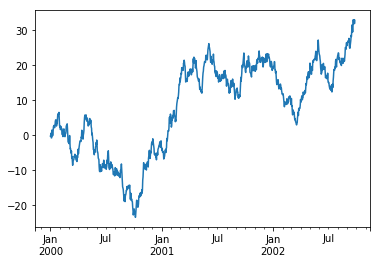

In [120]:
ts = pd.Series(np.random.randn(1000),
   .....:                index=pd.date_range('1/1/2000', periods=1000))
   .....:
ts = ts.cumsum()
ts.plot()

In [123]:
import matplotlib.pyplot as plt

In [126]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
   .....:                   columns=['A', 'B', 'C', 'D'])
   .....:
df = df.cumsum()
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

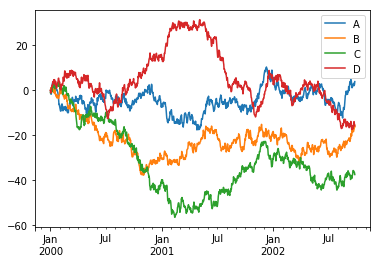

In [125]:
df.plot()
plt.legend(loc='best')

## Getting Data In/Out 

### CSV

In [127]:
df.to_csv('foo.csv')

In [128]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.712141,-0.555080,1.049542,0.972101
1,2000-01-02,1.793387,-0.005041,0.267896,2.043528
2,2000-01-03,0.728746,0.013176,2.145330,1.225749
3,2000-01-04,2.815350,0.371396,1.656967,2.150354
4,2000-01-05,1.697577,-1.460482,1.295318,1.687524
5,2000-01-06,2.276641,-1.152162,1.933800,0.934295
6,2000-01-07,1.905939,-1.359440,0.905795,1.127432
7,2000-01-08,-0.494267,-0.571661,2.461418,1.028058
8,2000-01-09,-1.583457,0.166353,1.933824,2.047498
9,2000-01-10,-0.862373,-1.263895,1.257952,2.483551


### HDF5

In [129]:
df.to_hdf('foo.h5', 'df')

In [130]:
pd.read_hdf('foo.h5', 'df')

,A,B,C,D
2000-01-01,0.712141,-0.555080,1.049542,0.972101
2000-01-02,1.793387,-0.005041,0.267896,2.043528
2000-01-03,0.728746,0.013176,2.145330,1.225749
2000-01-04,2.815350,0.371396,1.656967,2.150354
2000-01-05,1.697577,-1.460482,1.295318,1.687524
2000-01-06,2.276641,-1.152162,1.933800,0.934295
2000-01-07,1.905939,-1.359440,0.905795,1.127432
2000-01-08,-0.494267,-0.571661,2.461418,1.028058
2000-01-09,-1.583457,0.166353,1.933824,2.047498
2000-01-10,-0.862373,-1.263895,1.257952,2.483551


### Excel

In [131]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

In [132]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,A,B,C,D
2000-01-01,0.712141,-0.555080,1.049542,0.972101
2000-01-02,1.793387,-0.005041,0.267896,2.043528
2000-01-03,0.728746,0.013176,2.145330,1.225749
2000-01-04,2.815350,0.371396,1.656967,2.150354
2000-01-05,1.697577,-1.460482,1.295318,1.687524
2000-01-06,2.276641,-1.152162,1.933800,0.934295
2000-01-07,1.905939,-1.359440,0.905795,1.127432
2000-01-08,-0.494267,-0.571661,2.461418,1.028058
2000-01-09,-1.583457,0.166353,1.933824,2.047498
2000-01-10,-0.862373,-1.263895,1.257952,2.483551


## Gotchas

In [133]:
if pd.Series([False, True, False]):
...     print("I was true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().